### Evaluating a classifier
- Import MNIST Dataset
- Train a binary classifier
- Calculate accuracy, precision, recall, and F1 score
- Plot precision and recall versus threshold
- Plot precision versus recall



### Import MNIST dataset

In [1]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


### Visualize Data

Label:  0


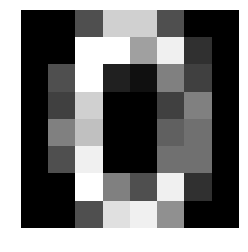

[ 0.  0.  5. 13. 13.  5.  0.  0.  0.  0. 16. 16. 10. 15.  3.  0.  0.  5.
 16.  2.  1.  8.  4.  0.  0.  4. 13.  0.  0.  4.  8.  0.  0.  8. 12.  0.
  0.  6.  7.  0.  0.  5. 15.  0.  0.  7.  7.  0.  0.  0. 16.  8.  5. 15.
  3.  0.  0.  0.  5. 14. 15.  9.  0.  0.]


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt


sample = 305
print("Label: ", y[sample])

some_digit = X[sample]
some_digit_image = some_digit.reshape(8,8)

plt.imshow(some_digit_image, cmap='gray')
plt.axis("off")
plt.show()

print(X[sample])

In [8]:
X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]
print("Training Data: ", X_train.shape, y_train.shape)
print("Testing Data: ", X_test.shape, y_test.shape)

Training Data:  (1000, 64) (1000,)
Testing Data:  (797, 64) (797,)


In [9]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

### Train a binary classifer
The classifer predicts if a sample is "3" or "not 3".

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [13]:
y_pred = sgd_clf.predict(X_test)
print("Predictions: ", y_pred.shape)
#print(y_pred)

sgd_clf.predict([X[sample]])

Predictions:  (797,)


array([False])

## Accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_3, y_pred)

0.9435382685069009

## Precision

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_3, y_pred)

0.67

## Recall

In [16]:
recall_score(y_test_3, y_pred)

0.8481012658227848

### F1 score

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test_3, y_pred)

0.7486033519553073

## Precision/Recall Trade-off
### Plot precision and recall versus threshold

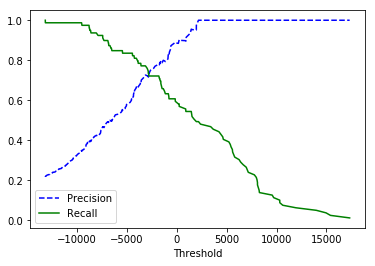

In [18]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_test, y_test_3, cv=3, method="decision_function")
#print(y_scores)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test_3, y_scores)

#import numpy as np
#min_thresh = np.min(thresholds)
#thresholds = thresholds + min_thresh
#thresh = thresholds / np.linalg.norm(thresholds)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

### Plot precision versus recall

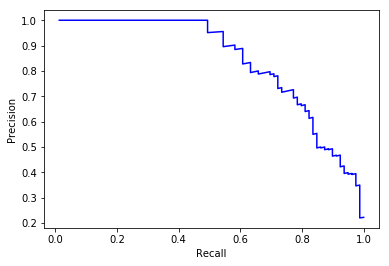

In [19]:

plt.plot(recalls[:-1],precisions[:-1], "b-")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### Comparing models with precision vs. recall

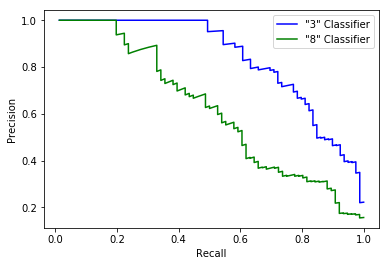

In [20]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)
sgd_clf_8 = SGDClassifier(random_state=42)
sgd_clf_8.fit(X_train, y_train_8)
y_scores_8 = cross_val_predict(sgd_clf, X_test, y_test_8, cv=3, method="decision_function")
precisions_8, recalls_8, thresholds_8 = precision_recall_curve(y_test_8, y_scores_8)

plt.plot(recalls[:-1],precisions[:-1], "b-", label="\"3\" Classifier")
plt.plot(recalls_8[:-1],precisions_8[:-1], "g-", label="\"8\" Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
